<h1 align="center">
Exploring Hit Songs (1970 - Present)
</h1>

## 1. Introduction

In this prelimnary analysis, I will dive into the world of hit songs, focusing on the years from 1970 to today. By analyzing songs over these years, I want to see if there are any patterns and trends that can tell a story not only by looking into the spotify data, but also bring in external data to back up my findings. I also want to transition into more modern hits and see if I can answer questions like "What makes a hit today?"

## 2. Setting Up the Environment

Importing necessary libraries for this analysis. I'll use pandas for data manipulation, seaborn for visualization, and a few others for specific tasks if needed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# loading spotify dataset gathered from the spotify API
df = pd.read_csv('../data/top_hits_1970_to_2019_cleaned.csv')

<br>

## 3. Data Overview

Most of this is stated in the Spotify API docs, but it's always nice to double check what you're working with.

In [13]:
# basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4997 non-null   object 
 1   artist            4997 non-null   object 
 2   popularity        4997 non-null   int64  
 3   explicit          4997 non-null   bool   
 4   energy            4997 non-null   float64
 5   tempo             4997 non-null   float64
 6   positiveness      4997 non-null   float64
 7   danceability      4997 non-null   float64
 8   acousticness      4997 non-null   float64
 9   loudness          4997 non-null   float64
 10  mode              4997 non-null   object 
 11  duration_minutes  4997 non-null   float64
 12  key               4997 non-null   object 
 13  album_name        4997 non-null   object 
 14  year              4997 non-null   int64  
dtypes: bool(1), float64(7), int64(2), object(5)
memory usage: 551.6+ KB


In [14]:
# summary stats for numerical columns
df.describe()

,popularity,energy,tempo,positiveness,danceability,acousticness,loudness,duration_minutes,year
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,66.165699,0.665076,119.724356,0.596319,0.631731,0.197985,-7.888798,4.072403,1994.502502
std,10.721405,0.189645,26.743248,0.240122,0.147734,0.226230,3.448213,1.011492,14.431814
min,36.000000,0.026400,50.937000,0.037700,0.135000,0.000005,-24.709000,1.500000,1970.000000
25%,59.000000,0.535000,99.931000,0.409000,0.540000,0.025000,-9.972000,3.500000,1982.000000
50%,67.000000,0.688000,119.040000,0.615000,0.645000,0.103000,-7.170000,3.900000,1994.000000
75%,74.000000,0.819000,133.739000,0.798000,0.736000,0.301000,-5.281000,4.500000,2007.000000
max,99.000000,0.999000,210.857000,0.989000,0.980000,0.978000,-0.140000,26.000000,2019.000000


In [15]:
# first rows of dataframe
df.head()

,name,artist,popularity,explicit,energy,tempo,positiveness,danceability,acousticness,loudness,mode,duration_minutes,key,album_name,year
0,Let It Be - Remastered 2009,The Beatles,79,False,0.403,143.462,0.410,0.443,0.6310,-8.339,Major,4.1,C,Let It Be (Remastered),1970
1,Cecilia,Simon & Garfunkel,76,False,0.876,102.762,0.954,0.755,0.3570,-8.867,Major,2.9,C,Bridge Over Troubled Water,1970
2,Son of a Preacher Man,Aretha Franklin,38,False,0.473,77.583,0.561,0.474,0.5450,-11.454,Major,3.3,D,The Queen Of Soul,1970
3,Who'll Stop The Rain,Creedence Clearwater Revival,65,False,0.797,123.566,0.622,0.598,0.0424,-6.793,Major,2.5,G,Cosmo's Factory (Expanded Edition),1970
4,I Want You Back,The Jackson 5,80,False,0.538,196.605,0.886,0.469,0.3050,-13.559,Major,2.9,Gsharp/Aflat,Diana Ross Presents The Jackson 5,1970


I don't intened of using all of the attributes listed above and I am currently working on a dictionairy for each column that will describe each attribute and their values in a more in-depth way.

In [16]:
columns_to_count = ['name', 'artist', 'album_name']

# count unique song names, artist names, and album names
for col in columns_to_count:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

name: 4658 unique values
artist: 1938 unique values
album_name: 3521 unique values


So this dataset contains 4921 unique song names, coming from 2012 different artists and spread across 3774 albums.
Seems like a good spread of artist and songs over the years, unfortunately it was not possible to get the genres of the songs from the API but I will look into other data sources for this later.

Next, I want to look at how certain song attributes have changed over the years.

<br>

## 4. Looking into song attributes of hit songs (1970-present)

### 4.1 Energy, positiveness and danceability of songs

**Energy**, **postiveness**, and **danceability** sounds like a good place to start when exploring this dataset and how the attributes have changed over time.

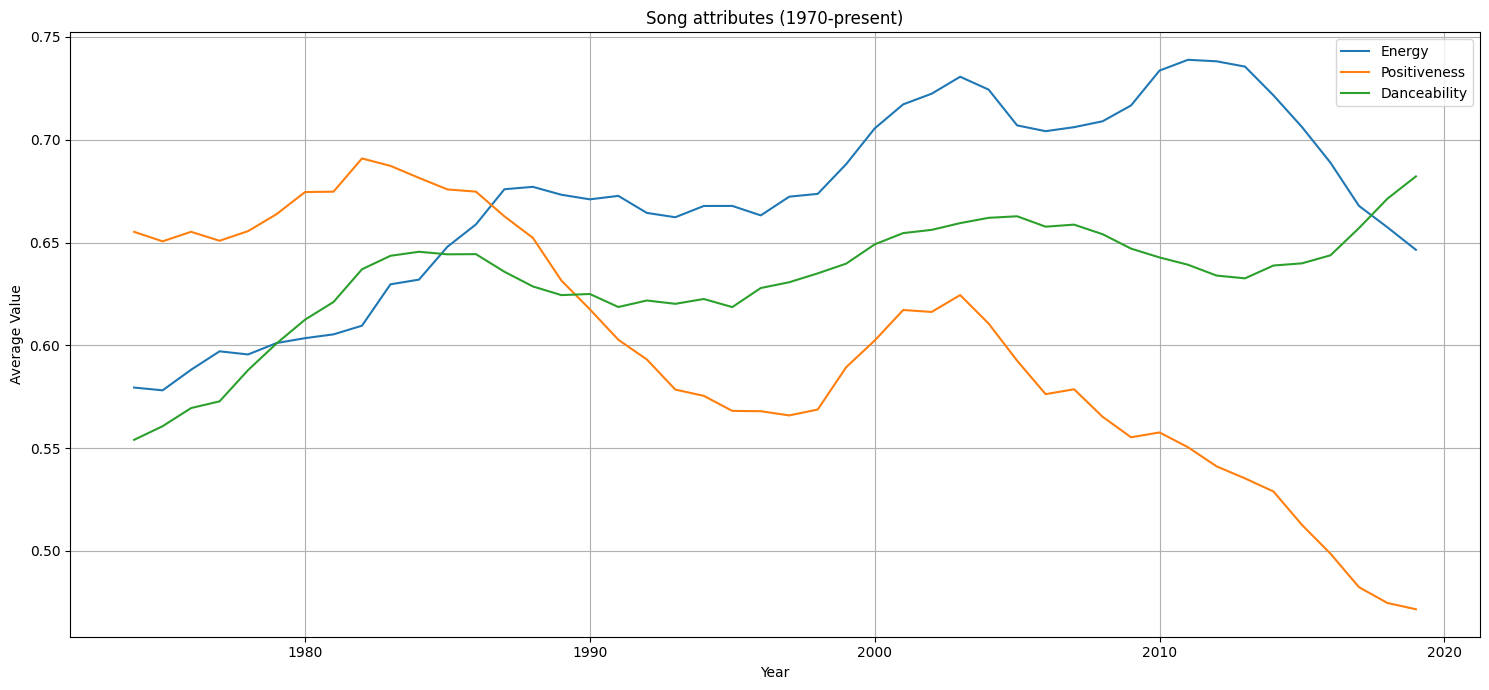

In [17]:
columns_for_attr_linechart = ['energy', 'positiveness', 'danceability']

# group data by year and calculate mean for each column
grouped_data_attr = df.groupby('year')[columns_for_attr_linechart].mean()

window_size = 5  # 5 year rolling average (LOOK INTO THIS)

# get moving averages
grouped_data_attr['energy_moving'] = grouped_data_attr['energy'].rolling(window=window_size).mean()
grouped_data_attr['positiveness_moving'] = grouped_data_attr['positiveness'].rolling(window=window_size).mean()
grouped_data_attr['danceability_moving'] = grouped_data_attr['danceability'].rolling(window=window_size).mean()


plt.figure(figsize=(15, 7))

# plot moving averages of attributes
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='energy_moving', label='Energy')
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='positiveness_moving', label='Positiveness')
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='danceability_moving', label='Danceability')

# set title and labels
plt.title('Song attributes (1970-present)')
plt.ylabel('Average Value')
plt.xlabel('Year')

# display legend and grid lines
plt.legend()
plt.grid(True)

# adjust the layout of the plot to make sure everything fits
plt.tight_layout()

# show plot
plt.show()


### Potential Reasons

<h5>Energy</h5>
The rise in energy could be correlated with the loudness war. Songs that are more compressed and have less dynamic range tend to sound more "in your face", which does also translate to loudness looking at the correlation matrix below. The dip after 2010 does align with the end of the loudness war, as there was a shift in mastering techniques and also with streaming platforms implementing volume normalization.
<h5>Positiveness</h5>
The decline in positivity might reflect on broader societal trends. The 1980s, which is often considered a decade of optimism in the west, was followed by more darker times in the 1990s and 2000s, with economic challenges, global conflicts, and a more complex political landscape. Music often reflects societal mood, and this decline in the chart might mirror just that. The small bump post-2000 might be the optimism of a new millennium, but this was short-lived.
<h5>Danceability</h5>
Songs today have higher danceability but aren't very upbeat or happy. Earlier dance tunes were generally more cheerful, while recent ones can still get you moving, even with a more sad tone. Also, the mainstream hip-hop scene is becoming more and more club-oriented, usually carrying deeper or darker messages.

### 4.2 Corr.matrix

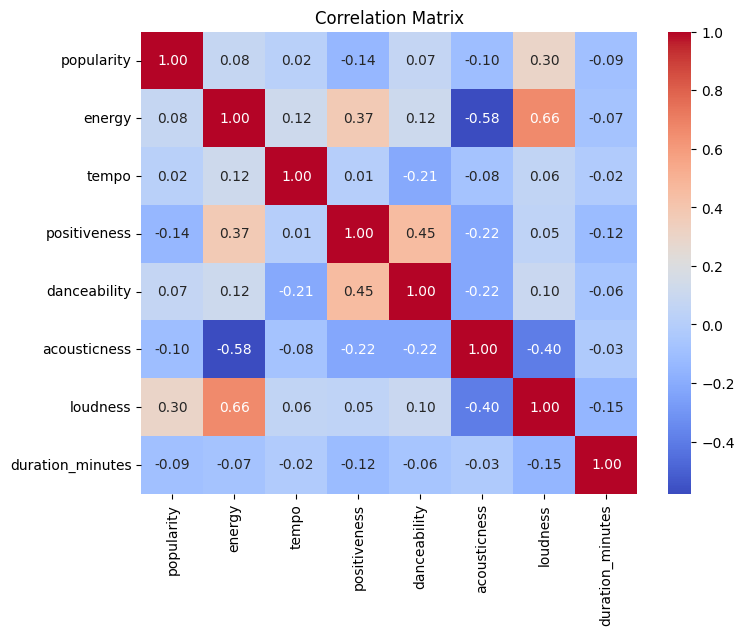

In [19]:
# calculate correlations for valid columns only, drop the rest
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['year'])
correlation_matrix = df[numeric_columns].corr()


# display corr matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 4.3 Acousticness and loudness

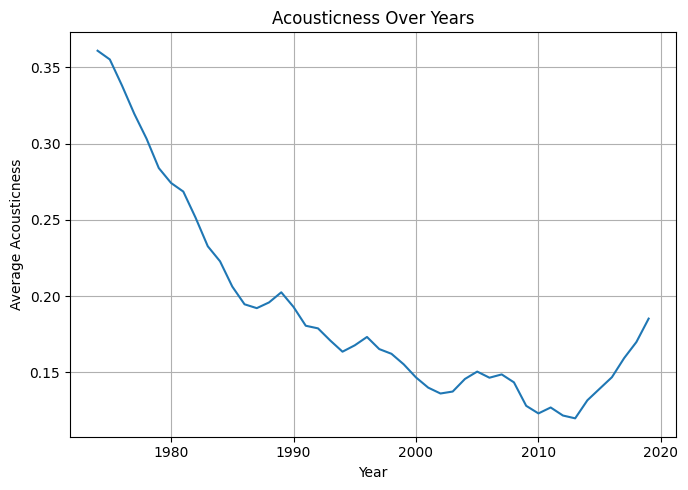

In [20]:
# group data by year and calculate mean for acousticness
grouped_data_acous = df.groupby('year')[['acousticness']].mean()

# moving average for acousticness
window_size = 5  # 5 year rolling average
grouped_data_acous['acousticness_moving'] = grouped_data_acous['acousticness'].rolling(window=window_size).mean()

plt.figure(figsize=(7, 5))

# plot moving average
sns.lineplot(data=grouped_data_acous, x=grouped_data_acous.index, y='acousticness_moving')

plt.title('Acousticness Over Years')
plt.ylabel('Average Acousticness')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### Potential Reasons

- 1970's and 1980's had a big rise of the usage of synthesizers, which also held on for a while with the modern pop and edm music that gained a lot of traction from 1990 to 2010. After this, the years from 2010 had artists that seeked a more authentic sound to their music. Which could explain why the acousticness of hit songs are on the rise again.
- Music production softwares became widely available and very popular around 2010 which could be a reason that the songs from this era had the lowest score of acousticness. Big record labels have the upper hand here where they can easily hire people to create more unique and acoustic vibes to their tracks which would have their music stand out even more.

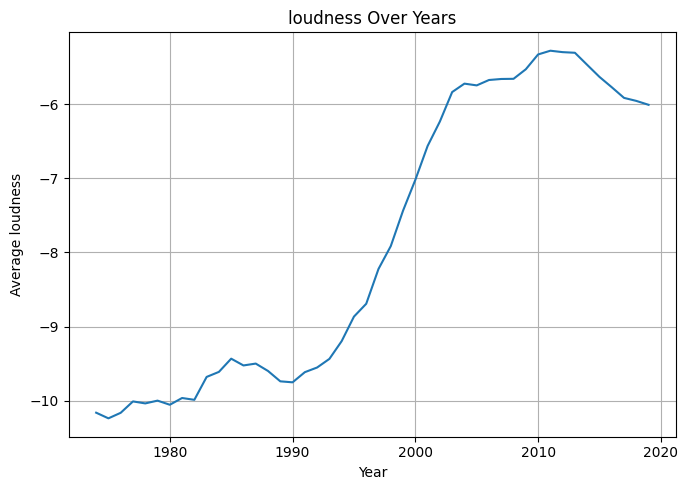

In [21]:
# group data by year and calculate mean for acousticness
grouped_data_acous = df.groupby('year')[['loudness']].mean()

# moving average for acousticness
window_size = 5  # 5 year rolling average
grouped_data_acous['loudness_moving'] = grouped_data_acous['loudness'].rolling(window=window_size).mean()

plt.figure(figsize=(7, 5))

# plot moving average
sns.lineplot(data=grouped_data_acous, x=grouped_data_acous.index, y='loudness_moving')

plt.title('loudness Over Years')
plt.ylabel('Average loudness')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### Potential reasons

- The loudness war: This is a well-known phenomenon in the music industry where the perceived loudness of recordings was increased to make them stand out more. This was achieved by compressing the dynamic range of tracks, which made quieter parts of songs louder. The trend peaked around 2010.
- As tracks became louder and more compressed, many listeners and artists began to notice a loss of dynamic range and express concern about "listener fatigue." This is a phenomenon where overly loud and compressed music can become tiring to listen to over extended periods (Harshness + volume = listener fatigue). The backlash against the loudness war might have contributed to a trend back toward more dynamic mastering of songs.

<br>

## 5. Modern Day Hits

### 5.1 What makes a hit today?

**Notes**: Gather data from less popular songs, Gather other factors such as followers, record labels, total artist plays, lyrics etc

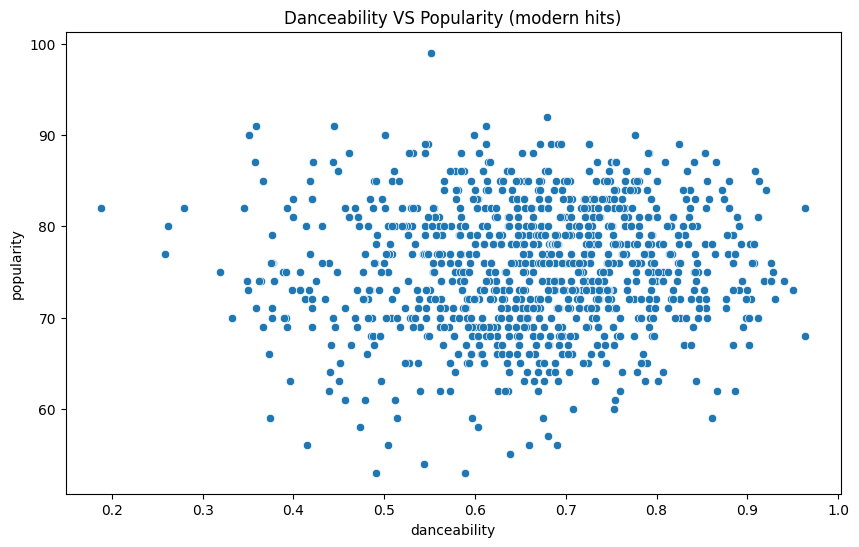

In [22]:
modern_hits = df[(df['year'] >= 2010) & (df['year'] <= 2019)]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=modern_hits, x='danceability', y='popularity')
plt.title(f"Danceability VS Popularity (modern hits)")
plt.show()

## 6. EXTRAS

### 6.1 Bar chart race, artist appearances in top lists over the years

In [24]:
import bar_chart_race as bcr

top_20_artists = df['artist'].value_counts().head(20).index.tolist()
df_top_20 = df[df['artist'].isin(top_20_artists)]

# pivot data to get counts of songs by artist and year
df_pivot = df_top_20.groupby(['year', 'artist']).size().unstack().fillna(0)
df_pivot_cumsum = df_pivot.cumsum()

bcr.bar_chart_race(
    df=df_pivot_cumsum, 
    title='Artists appearances in top lists 1970-present', 
    orientation='h', 
    sort='desc', 
    n_bars=10, 
    steps_per_period=40, 
    period_length=1000
)

/Users/joel/repos/hit-songs-analysis/env/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Users/joel/repos/hit-songs-analysis/env/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
